**KNN**

4422102/4422102 [==============================] - 0s 0us/step
Eğitim Doğruluğu: 0.8802833333333333
Doğrulama Doğruluğu: 0.8487
Eğitim F1-skoru: 0.8796666853495134
Doğrulama F1-skoru: 0.848414682359921
Eğitim Recall: 0.8802833333333333
Doğrulama Recall: 0.8487
Eğitim Kesinlik: 0.8819254065805284
Doğrulama Kesinlik: 0.8516681022821293


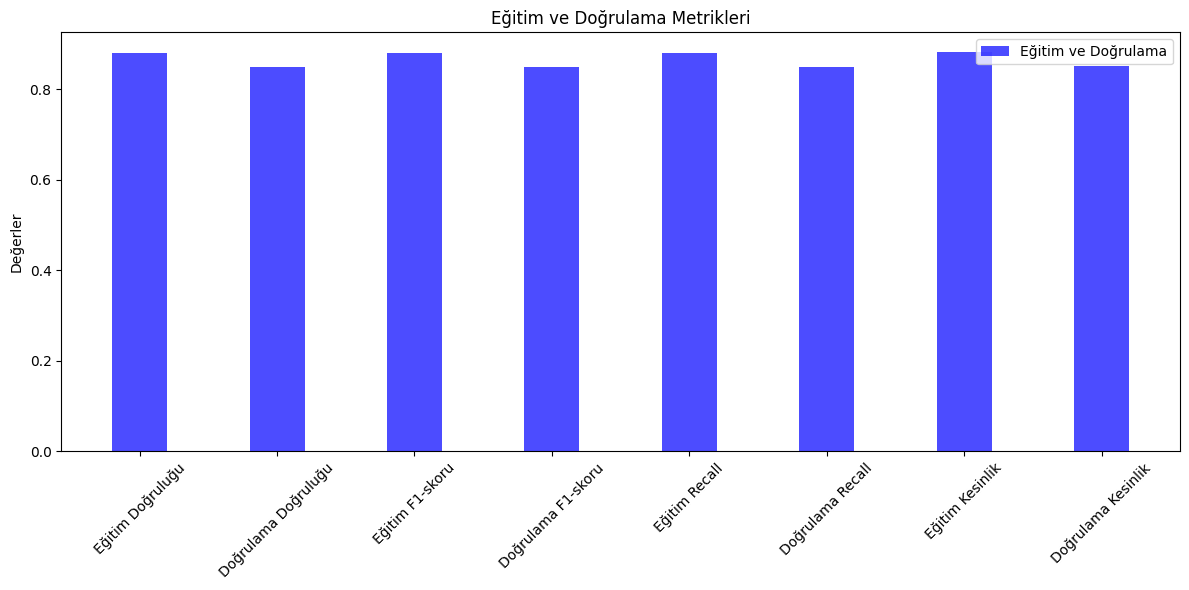

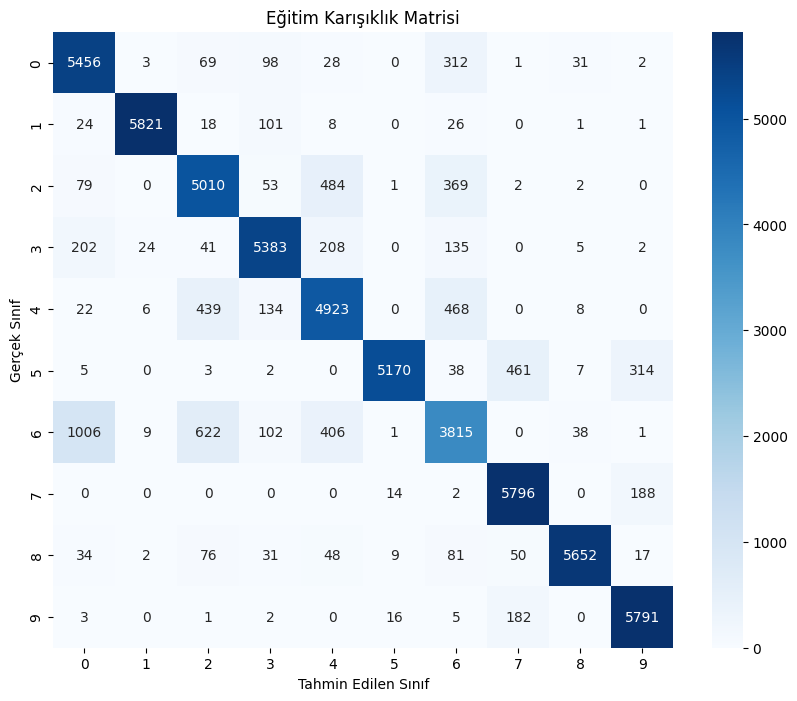

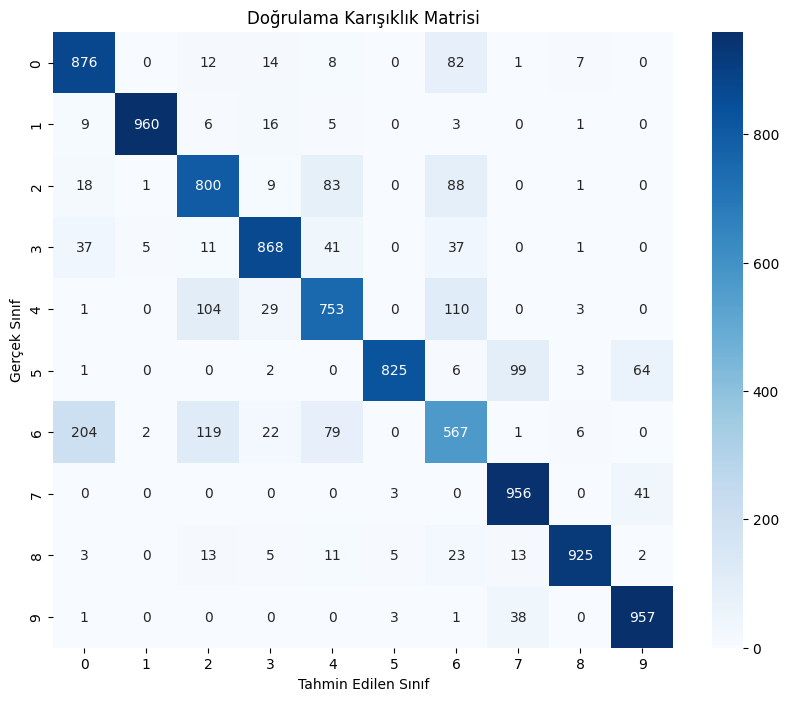

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

# Fashion MNIST veri setini yükleme
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Verileri normalize etme
scaler = StandardScaler()

# Her bir görüntüyü düzleştirme
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Verileri normalize etme
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)


###  KNN


knn = KNeighborsClassifier(n_neighbors=10)

# Modeli eğitme
knn.fit(train_images, train_labels)

# Eğitim veri seti üzerinde tahmin yapma
train_predictions = knn.predict(train_images)

# Doğrulama veri seti üzerinde tahmin yapma
test_predictions = knn.predict(test_images)

# Eğitim metriklerini hesaplama
train_accuracy = accuracy_score(train_labels, train_predictions)
train_f1 = f1_score(train_labels, train_predictions, average='weighted')
train_recall = recall_score(train_labels, train_predictions, average='weighted')
train_precision = precision_score(train_labels, train_predictions, average='weighted')

# Doğrulama metriklerini hesaplama
accuracy = accuracy_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

# Sonuçları yazdırma
print('Eğitim Doğruluğu:', train_accuracy)
print('Doğrulama Doğruluğu:', accuracy)
print('Eğitim F1-skoru:', train_f1)
print('Doğrulama F1-skoru:', f1)
print('Eğitim Recall:', train_recall)
print('Doğrulama Recall:', recall)
print('Eğitim Kesinlik:', train_precision)
print('Doğrulama Kesinlik:', precision)

# Metrikleri görselleştirme
labels = ['Eğitim Doğruluğu', 'Doğrulama Doğruluğu', 'Eğitim F1-skoru', 'Doğrulama F1-skoru',
          'Eğitim Recall', 'Doğrulama Recall', 'Eğitim Kesinlik', 'Doğrulama Kesinlik']

# None değerleri yerine 0 koymak için
metrics_train = [train_accuracy, accuracy, train_f1, f1, train_recall, recall, train_precision, precision]
metrics_train = [0 if metric is None else metric for metric in metrics_train]

x = range(len(labels))

plt.figure(figsize=(12, 6))
plt.bar(x, metrics_train, width=0.4, label='Eğitim ve Doğrulama', color='b', alpha=0.7)
plt.xticks(x, labels, rotation=45)
plt.title('Eğitim ve Doğrulama Metrikleri')
plt.ylabel('Değerler')
plt.legend()
plt.tight_layout()
plt.show()

# Karışıklık matrislerini oluşturma
train_cm = confusion_matrix(train_labels, train_predictions)
test_cm = confusion_matrix(test_labels, test_predictions)

# Eğitim karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Eğitim Karışıklık Matrisi')
plt.show()

# Doğrulama karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Doğrulama Karışıklık Matrisi')
plt.show()


 **Logistic Regression**

Eğitim Doğruluğu: 0.88655
Doğrulama Doğruluğu: 0.8353
Eğitim F1-skoru: 0.8858811911214493
Doğrulama F1-skoru: 0.8342628713907275
Eğitim Recall: 0.88655
Doğrulama Recall: 0.8353
Eğitim Kesinlik: 0.8856235592787618
Doğrulama Kesinlik: 0.833589781508269


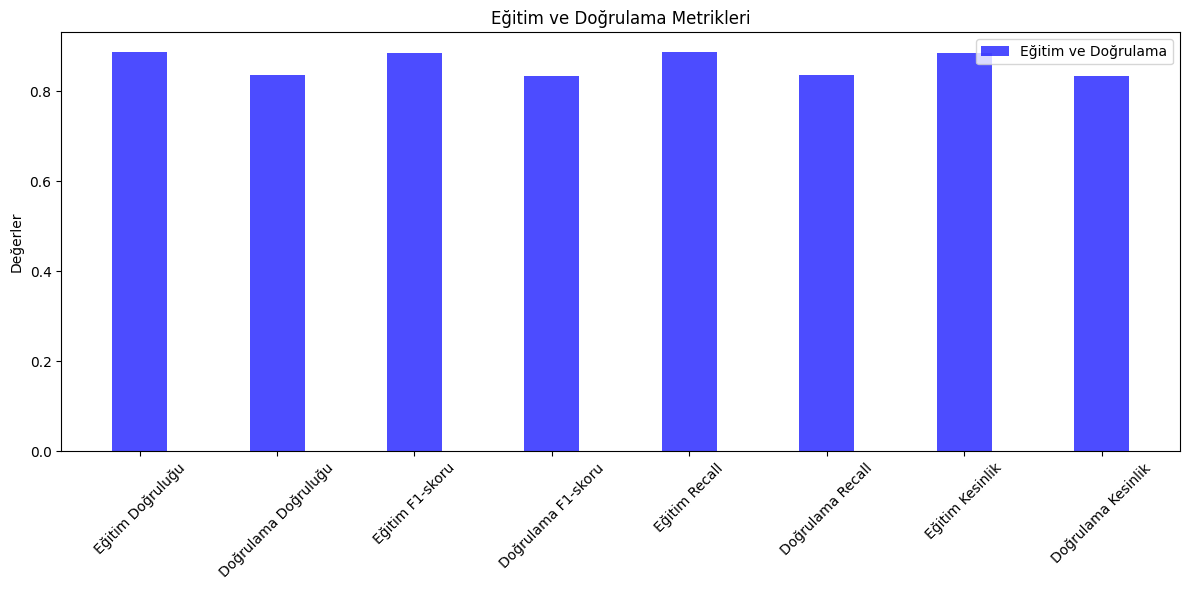

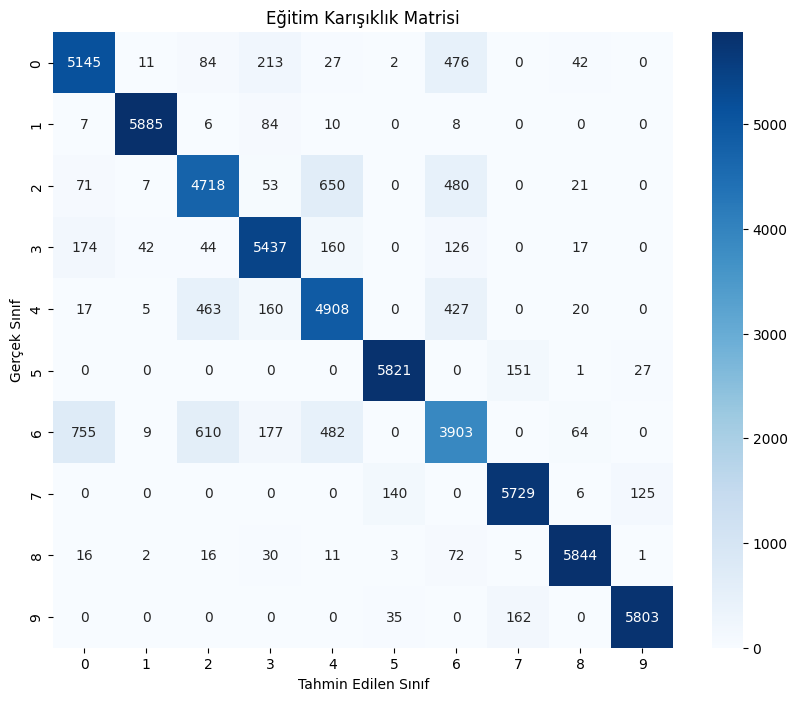

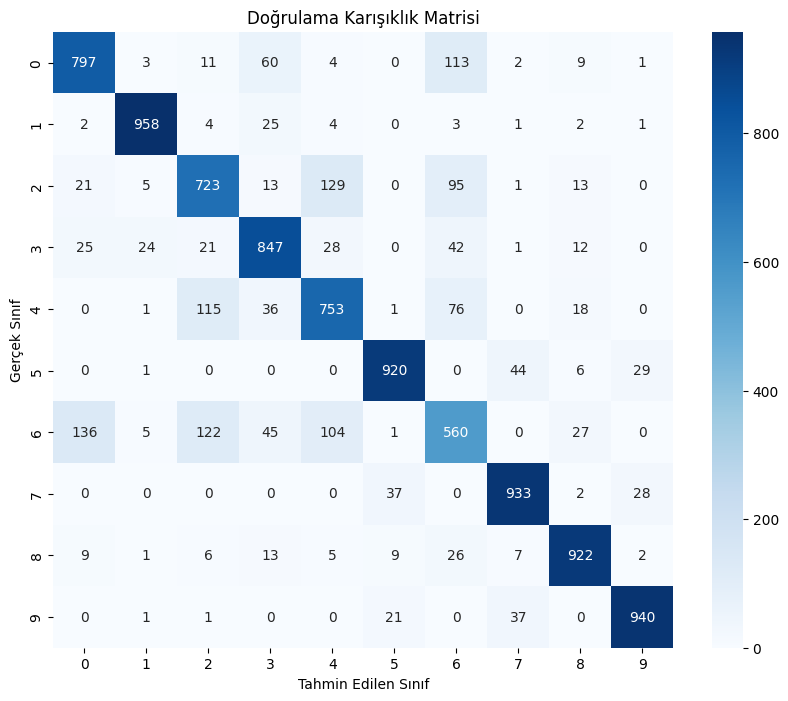

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from tensorflow.keras.datasets import fashion_mnist

import warnings
warnings.filterwarnings("ignore")

# Fashion MNIST veri setini yükleme
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Verileri normalize etme
scaler = StandardScaler()

# Her bir görüntüyü düzleştirme
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Verileri normalize etme
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

# Logistic Regression modelini tanımlama
log_reg = LogisticRegression(min_iter=1000)

# Modeli eğitme
log_reg.fit(train_images, train_labels)

# Eğitim veri seti üzerinde tahmin yapma
train_predictions = log_reg.predict(train_images)

# Doğrulama veri seti üzerinde tahmin yapma
test_predictions = log_reg.predict(test_images)

# Eğitim metriklerini hesaplama
train_accuracy = accuracy_score(train_labels, train_predictions)
train_f1 = f1_score(train_labels, train_predictions, average='weighted')
train_recall = recall_score(train_labels, train_predictions, average='weighted')
train_precision = precision_score(train_labels, train_predictions, average='weighted')

# Doğrulama metriklerini hesaplama
accuracy = accuracy_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

# Sonuçları yazdırma
print('Doğrulama Doğruluğu:', accuracy)

print('Doğrulama F1-skoru:', f1)

print('Doğrulama Recall:', recall)

print('Doğrulama Kesinlik:', precision))

# Metrikleri görselleştirme
labels = ['Eğitim Doğruluğu', 'Doğrulama Doğruluğu', 'Eğitim F1-skoru', 'Doğrulama F1-skoru',
          'Eğitim Recall', 'Doğrulama Recall', 'Eğitim Kesinlik', 'Doğrulama Kesinlik']

metrics_train = [train_accuracy, accuracy, train_f1, f1, train_recall, recall, train_precision, precision]
metrics_train = [0 if metric is None else metric for metric in metrics_train]

x = range(len(labels))

plt.figure(figsize=(12, 6))
plt.bar(x, metrics_train, width=0.4, label='Eğitim ve Doğrulama', color='b', alpha=0.7)
plt.xticks(x, labels, rotation=45)
plt.title('Eğitim ve Doğrulama Metrikleri')
plt.ylabel('Değerler')
plt.legend()
plt.tight_layout()
plt.show()

# Karışıklık matrislerini oluşturma
train_cm = confusion_matrix(train_labels, train_predictions)
test_cm = confusion_matrix(test_labels, test_predictions)

# Doğrulama karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Doğrulama Karışıklık Matrisi')
plt.show()


**Random Forest**

Doğrulama Doğruluğu: 0.8789
Doğrulama F1-skoru: 0.8776128556412337
Doğrulama Recall: 0.8789
Doğrulama Kesinlik: 0.8779098112376016


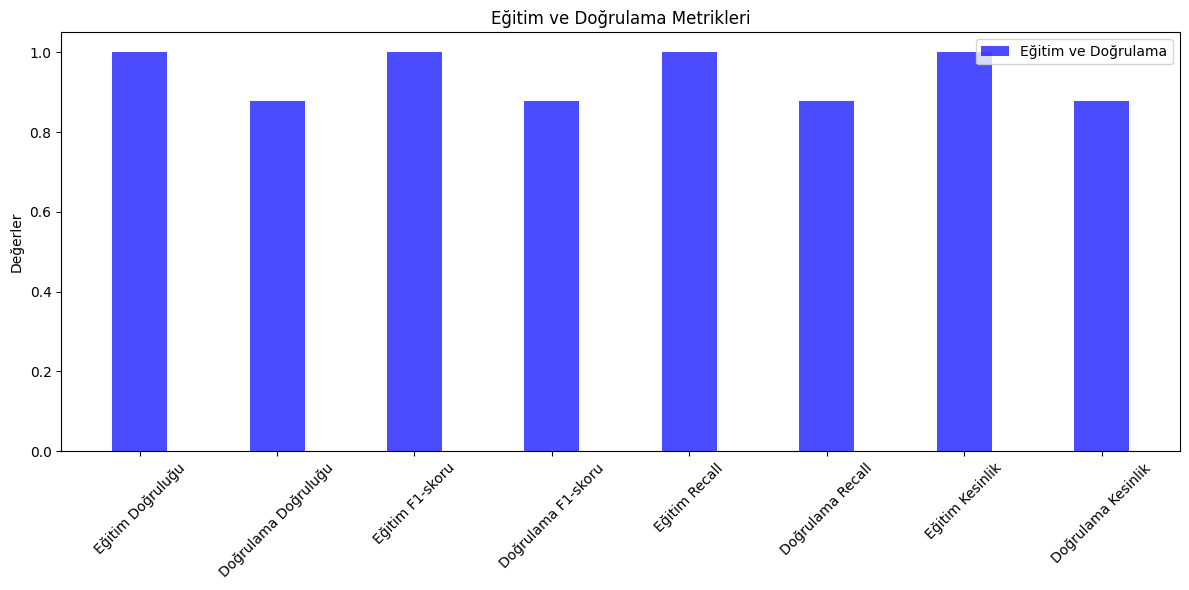

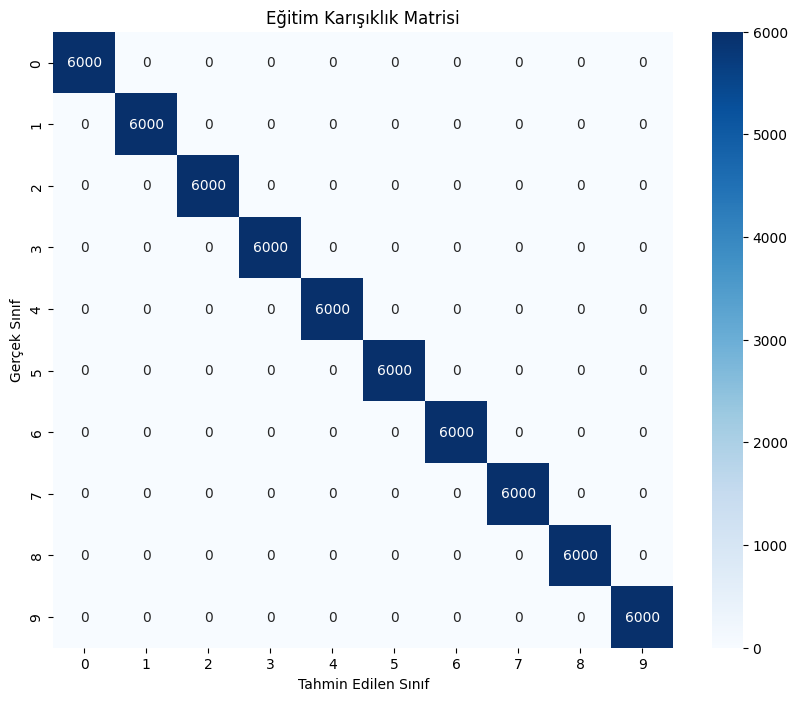

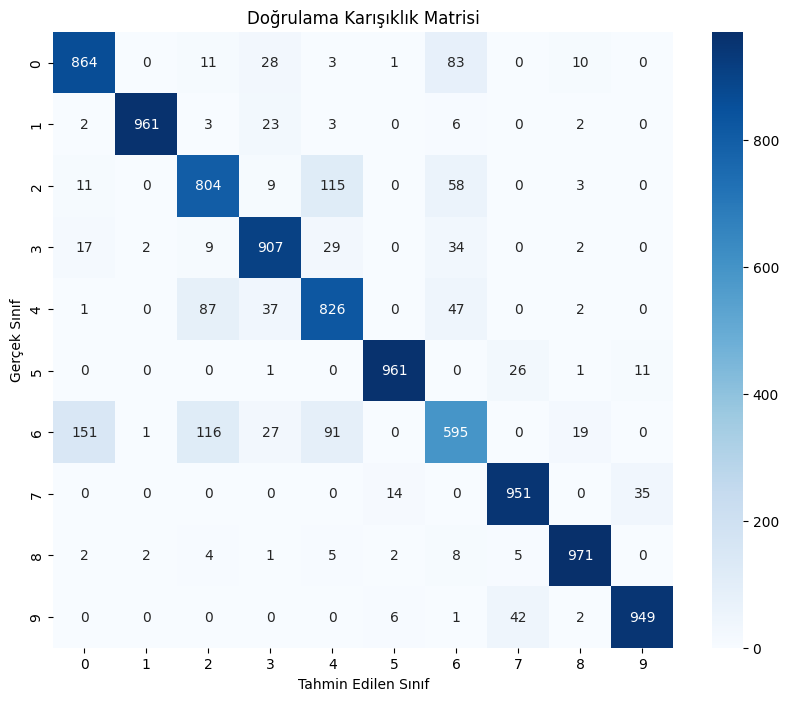

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from tensorflow.keras.datasets import fashion_mnist

import warnings
warnings.filterwarnings("ignore")

# Fashion MNIST veri setini yükleme
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Her bir görüntüyü düzleştirme ve verileri normalize etme
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

# Random Forest sınıflandırıcısını tanımlama
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=800)

# Modeli eğitme
rf_classifier.fit(train_images, train_labels)

# Eğitim veri seti üzerinde tahmin yapma
train_predictions = rf_classifier.predict(train_images)

# Doğrulama veri seti üzerinde tahmin yapma
test_predictions = rf_classifier.predict(test_images)

# Eğitim metriklerini hesaplama
train_accuracy = accuracy_score(train_labels, train_predictions)
train_f1 = f1_score(train_labels, train_predictions, average='weighted')
train_recall = recall_score(train_labels, train_predictions, average='weighted')
train_precision = precision_score(train_labels, train_predictions, average='weighted')

# Doğrulama metriklerini hesaplama
accuracy = accuracy_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

# Sonuçları yazdırma

print('Doğrulama Doğruluğu:', accuracy)

print('Doğrulama F1-skoru:', f1)

print('Doğrulama Recall:', recall)

print('Doğrulama Kesinlik:', precision)

# Metrikleri görselleştirme
labels = ['Eğitim Doğruluğu', 'Doğrulama Doğruluğu', 'Eğitim F1-skoru', 'Doğrulama F1-skoru',
          'Eğitim Recall', 'Doğrulama Recall', 'Eğitim Kesinlik', 'Doğrulama Kesinlik']

metrics_train = [train_accuracy, accuracy, train_f1, f1, train_recall, recall, train_precision, precision]
metrics_train = [0 if metric is None else metric for metric in metrics_train]

x = range(len(labels))

plt.figure(figsize=(12, 6))
plt.bar(x, metrics_train, width=0.4, label='Eğitim ve Doğrulama', color='b', alpha=0.7)
plt.xticks(x, labels, rotation=45)
plt.title('Eğitim ve Doğrulama Metrikleri')
plt.ylabel('Değerler')
plt.legend()
plt.tight_layout()
plt.show()

# Karışıklık matrislerini oluşturma
train_cm = confusion_matrix(train_labels, train_predictions)
test_cm = confusion_matrix(test_labels, test_predictions)

# Eğitim karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Eğitim Karışıklık Matrisi')
plt.show()

# Doğrulama karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Doğrulama Karışıklık Matrisi')
plt.show()


 **Decision** **Tree**

Doğrulama Doğruluğu: 0.7889
Doğrulama F1-skoru: 0.789781007495561
Doğrulama Recall: 0.7889
Doğrulama Kesinlik: 0.7909407354892841


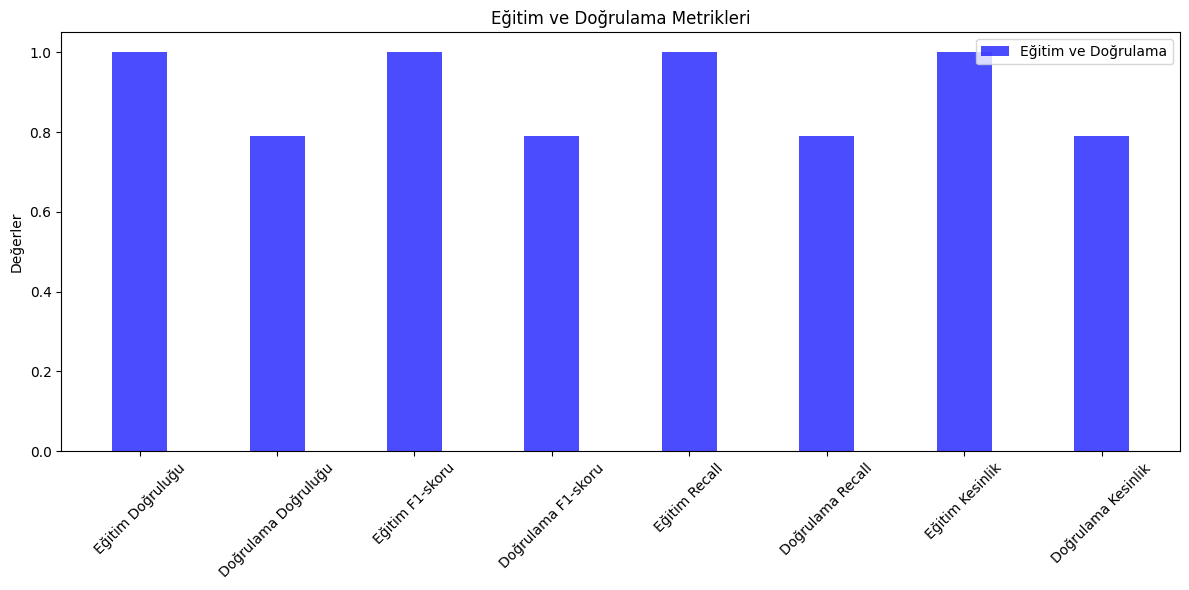

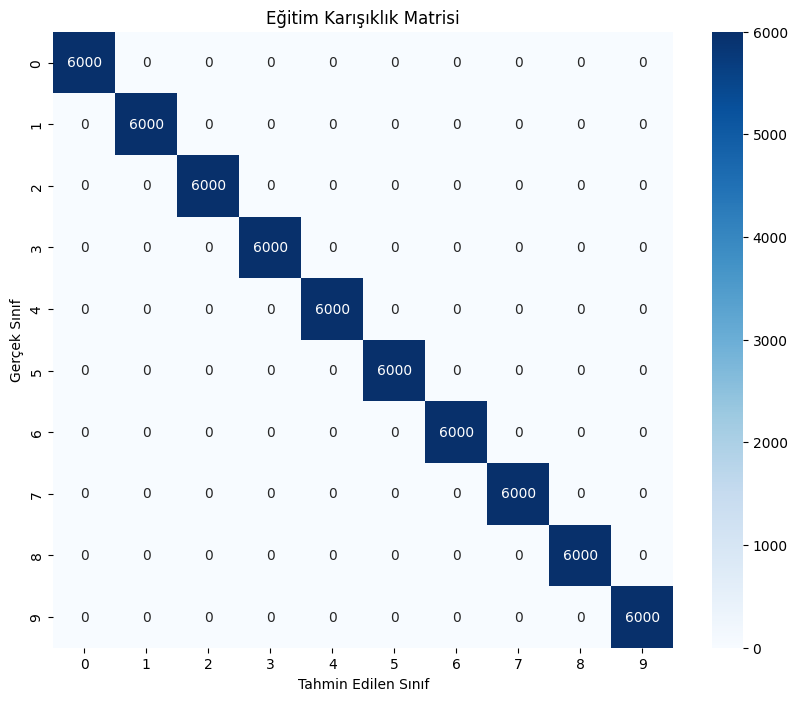

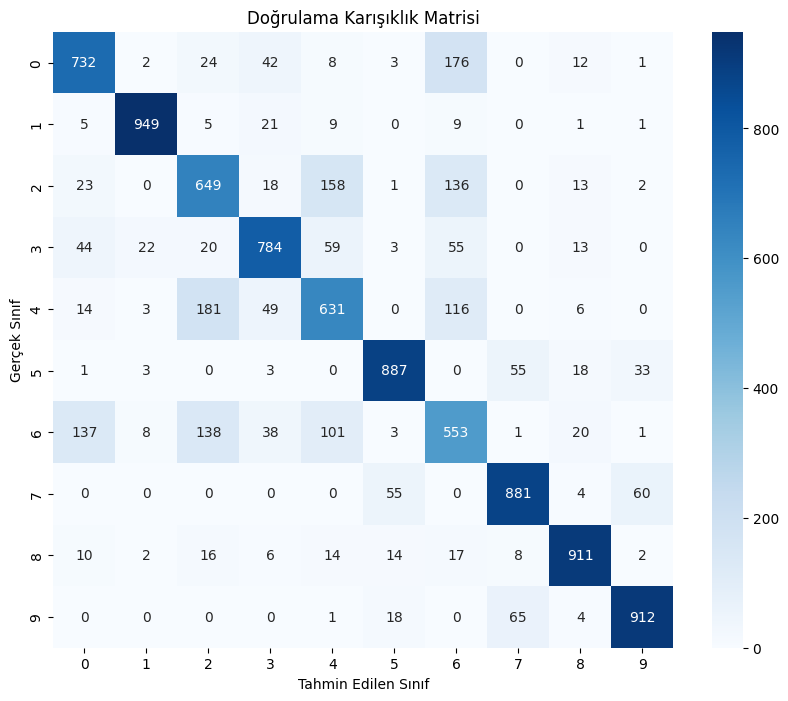

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from tensorflow.keras.datasets import fashion_mnist

import warnings
warnings.filterwarnings("ignore")

# Fashion MNIST veri setini yükleme
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Her bir görüntüyü düzleştirme ve verileri normalize etme
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

# Decision Tree sınıflandırıcısını tanımlama
dt_classifier = DecisionTreeClassifier(random_state=42)

# Modeli eğitme
dt_classifier.fit(train_images, train_labels)

# Eğitim veri seti üzerinde tahmin yapma
train_predictions = dt_classifier.predict(train_images)

# Doğrulama veri seti üzerinde tahmin yapma
test_predictions = dt_classifier.predict(test_images)

# Eğitim metriklerini hesaplama
train_accuracy = accuracy_score(train_labels, train_predictions)
train_f1 = f1_score(train_labels, train_predictions, average='weighted')
train_recall = recall_score(train_labels, train_predictions, average='weighted')
train_precision = precision_score(train_labels, train_predictions, average='weighted')

# Doğrulama metriklerini hesaplama
accuracy = accuracy_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

# Sonuçları yazdırma
print('Doğrulama Doğruluğu:', accuracy)

print('Doğrulama F1-skoru:', f1)

print('Doğrulama Recall:', recall)

print('Doğrulama Kesinlik:', precision)


# Metrikleri görselleştirme
labels = ['Eğitim Doğruluğu', 'Doğrulama Doğruluğu', 'Eğitim F1-skoru', 'Doğrulama F1-skoru',
          'Eğitim Recall', 'Doğrulama Recall', 'Eğitim Kesinlik', 'Doğrulama Kesinlik']

metrics_train = [train_accuracy, accuracy, train_f1, f1, train_recall, recall, train_precision, precision]
metrics_train = [0 if metric is None else metric for metric in metrics_train]

x = range(len(labels))

plt.figure(figsize=(12, 6))
plt.bar(x, metrics_train, width=0.4, label='Eğitim ve Doğrulama', color='b', alpha=0.7)
plt.xticks(x, labels, rotation=45)
plt.title('Eğitim ve Doğrulama Metrikleri')
plt.ylabel('Değerler')
plt.legend()
plt.tight_layout()
plt.show()

# Karışıklık matrislerini oluşturma
train_cm = confusion_matrix(train_labels, train_predictions)
test_cm = confusion_matrix(test_labels, test_predictions)

# Eğitim karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Eğitim Karışıklık Matrisi')
plt.show()

# Doğrulama karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Doğrulama Karışıklık Matrisi')
plt.show()


DECİSİON TREE DENEME

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=  33.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=  31.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=  32.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=  32.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=  31.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=  31.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=  32.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=  32.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=  30.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=  30.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=  30.9s


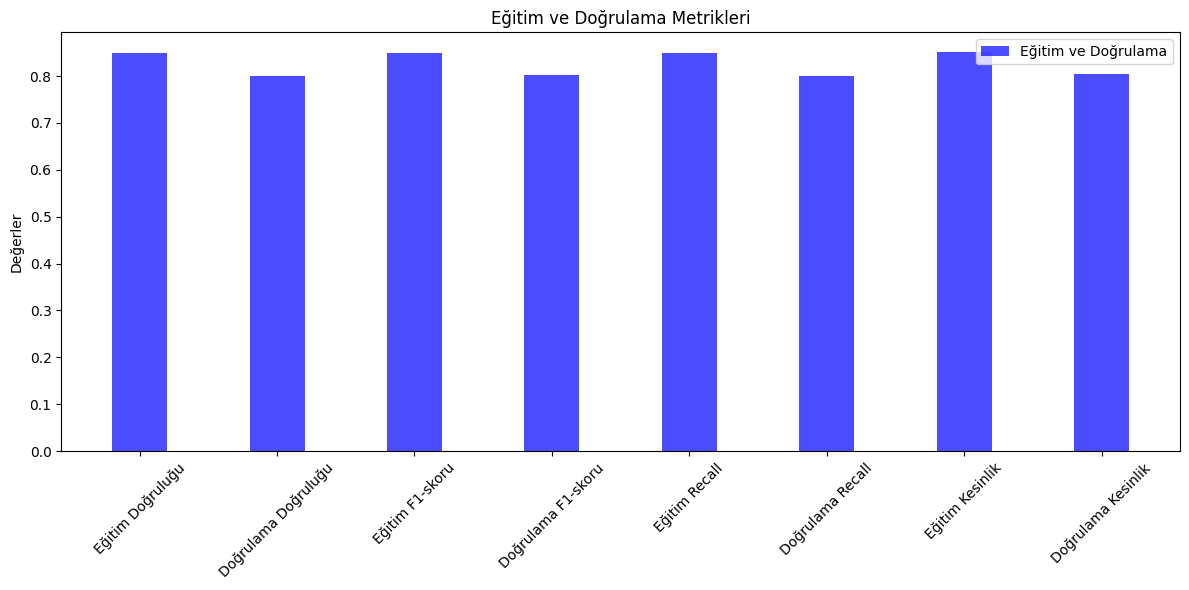

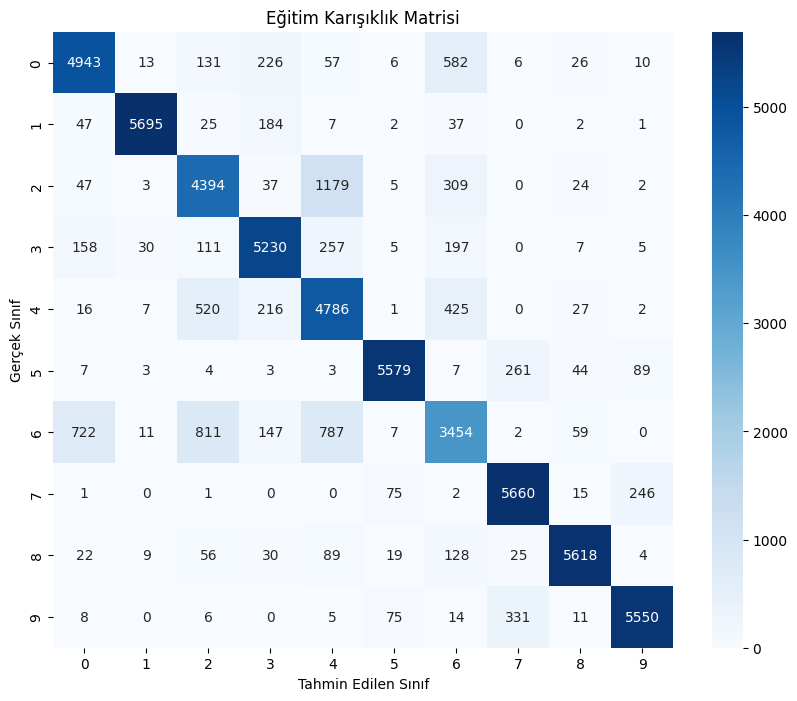

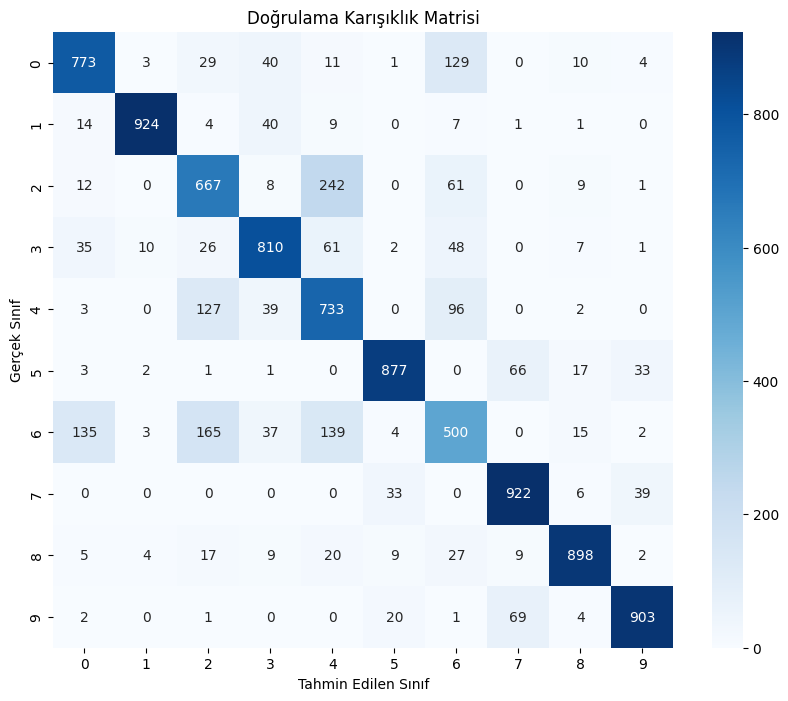

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.datasets import fashion_mnist

import warnings
warnings.filterwarnings("ignore")

# Fashion MNIST veri setini yükleme
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Her bir görüntüyü düzleştirme ve verileri normalize etme
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

# Decision Tree sınıflandırıcısını tanımlama ve hiperparametre grid'i oluşturma
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(train_images, train_labels)

# En iyi modeli elde etme
best_dt_classifier = grid_search.best_estimator_

# Eğitim ve doğrulama setleri üzerinde tahmin yapma
train_predictions = best_dt_classifier.predict(train_images)
test_predictions = best_dt_classifier.predict(test_images)

# Eğitim metriklerini hesaplama
train_accuracy = accuracy_score(train_labels, train_predictions)
train_f1 = f1_score(train_labels, train_predictions, average='weighted')
train_recall = recall_score(train_labels, train_predictions, average='weighted')
train_precision = precision_score(train_labels, train_predictions, average='weighted')

# Doğrulama metriklerini hesaplama
accuracy = accuracy_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

# Sonuçları yazdırma
print('Eğitim Doğruluğu:', train_accuracy)
print('Doğrulama Doğruluğu:', accuracy)
print('Eğitim F1-skoru:', train_f1)
print('Doğrulama F1-skoru:', f1)
print('Eğitim Recall:', train_recall)
print('Doğrulama Recall:', recall)
print('Eğitim Kesinlik:', train_precision)
print('Doğrulama Kesinlik:', precision)

# Metrikleri görselleştirme
labels = ['Eğitim Doğruluğu', 'Doğrulama Doğruluğu', 'Eğitim F1-skoru', 'Doğrulama F1-skoru',
          'Eğitim Recall', 'Doğrulama Recall', 'Eğitim Kesinlik', 'Doğrulama Kesinlik']

metrics_train = [train_accuracy, accuracy, train_f1, f1, train_recall, recall, train_precision, precision]
metrics_train = [0 if metric is None else metric for metric in metrics_train]

x = range(len(labels))

plt.figure(figsize=(12, 6))
plt.bar(x, metrics_train, width=0.4, label='Eğitim ve Doğrulama', color='b', alpha=0.7)
plt.xticks(x, labels, rotation=45)
plt.title('Eğitim ve Doğrulama Metrikleri')
plt.ylabel('Değerler')
plt.legend()
plt.tight_layout()
plt.show()

# Karışıklık matrislerini oluşturma
train_cm = confusion_matrix(train_labels, train_predictions)
test_cm = confusion_matrix(test_labels, test_predictions)

# Eğitim karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Eğitim Karışıklık Matrisi')
plt.show()

# Doğrulama karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Doğrulama Karışıklık Matrisi')
plt.show()


**YAPAY SİNİR AĞI**

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4876 - accuracy: 0.8255 - val_loss: 0.4177 - val_accuracy: 0.8516
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3658 - accuracy: 0.8664 - val_loss: 0.3845 - val_accuracy: 0.8590
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3319 - accuracy: 0.8776 - val_loss: 0.3913 - val_accuracy: 0.8585
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3108 - accuracy: 0.8859 - val_loss: 0.3762 - val_accuracy: 0.8673
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2910 - accuracy: 0.8916 - val_loss: 0.3648 - val_accuracy: 0.8685
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2779 - accuracy: 0.8954 - val_loss: 0.3457 - val_accuracy: 0.8759
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2675 - accuracy: 0.9005 - val_loss: 0.3412 - val_accuracy

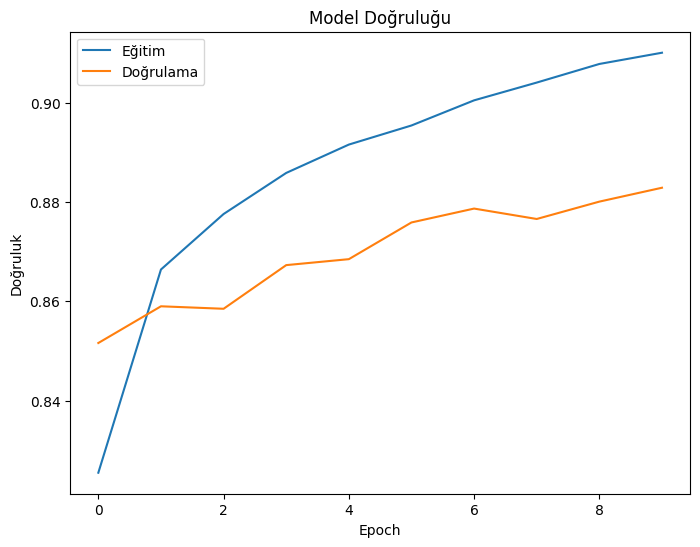

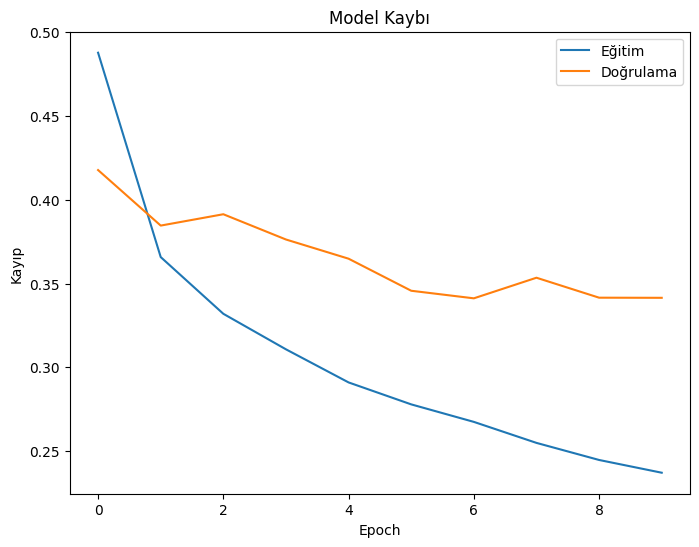

313/313 [==============================] - 1s 2ms/step


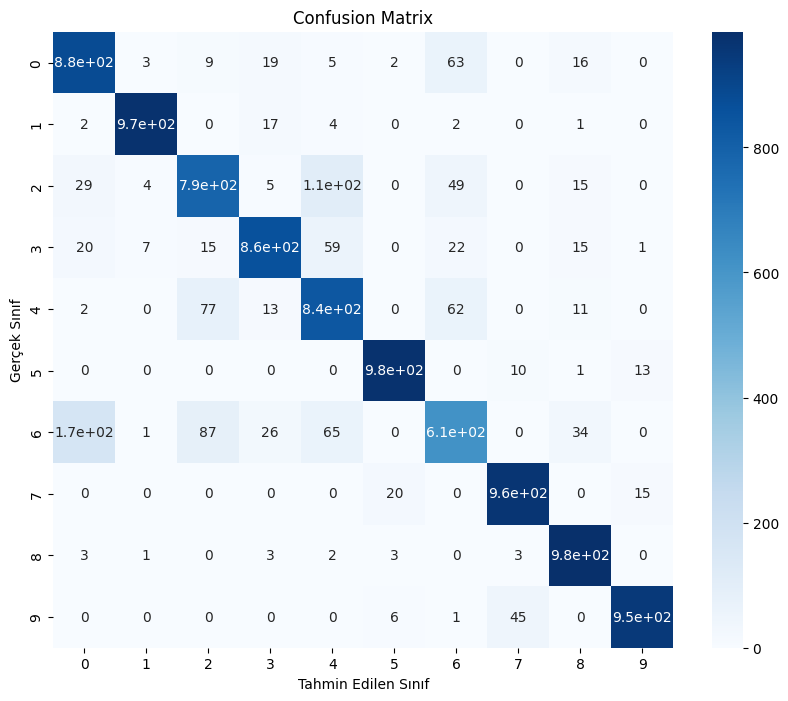

In [ ]:
# 1. Veri Yükleme ve Hazırlama
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Verileri normalleştirme
X_train = X_train / 255.0
X_test = X_test / 255.0

# 2. Model Tanımlama
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. Model Derleme
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Modeli Eğitme
epochs = 10
batch_size = 32

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

# 5. Sonuçların Görselleştirilmesi
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğu
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Doğrulama'], loc='upper left')
plt.show()

# Eğitim ve doğrulama kaybı
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Doğrulama'], loc='upper right')
plt.show()

# 6. Confusion Matrisi Oluşturma
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Tahminleri al
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

# Confusion matrisini hesapla
cm = confusion_matrix(y_test, y_pred_classes)

# Confusion matrisini görselleştir
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

**ÖN EĞİTİLMİŞ AĞ**
**DENSE121**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1. Veri Yükleme ve Hazırlama
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Verileri normalleştirme
X_train = X_train / 255.0
X_test = X_test / 255.0

# Görüntüleri 32x32 piksel boyutuna genişletme
X_train = np.expand_dims(X_train, axis=-1)
X_train = np.repeat(X_train, 3, axis=-1)
X_train = np.pad(X_train, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant', constant_values=0)

X_test = np.expand_dims(X_test, axis=-1)
X_test = np.repeat(X_test, 3, axis=-1)
X_test = np.pad(X_test, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant', constant_values=0)

# DenseNet121 modelini yükleme ve özelleştirme
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Transfer learning: DenseNet121 modelinin üstüne yeni katmanlar ekleyerek özelleştirme
x = Flatten()(densenet.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.45)(x)
output = Dense(10, activation='softmax')(x)

# Yeni modeli oluşturma
model_densenet = Model(densenet.input, output)

# Modeli derleme
model_densenet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Eğitme
epochs = 15
model_densenet.fit(X_train, tf.keras.utils.to_categorical(y_train), validation_data=(X_test, tf.keras.utils.to_categorical(y_test)), epochs=epochs, batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 1161s 597ms/step - loss: 0.5204 - accuracy: 0.8324 - val_loss: 0.3852 - val_accuracy: 0.8712
Epoch 2/15
1875/1875 [==============================] - 1108s 591ms/step - loss: 0.3428 - accuracy: 0.8840 - val_loss: 0.3085 - val_accuracy: 0.8899
Epoch 3/15
1875/1875 [==============================] - 1100s 587ms/step - loss: 0.3147 - accuracy: 0.8926 - val_loss: 0.3202 - val_accuracy: 0.8867
Epoch 4/15
1875/1875 [==============================] - 1101s 587ms/step - loss: 0.3365 - accuracy: 0.8891 - val_loss: 0.3214 - val_accuracy: 0.8879
Epoch 5/15
1875/1875 [==============================] - 1136s 606ms/step - loss: 0.2771 - accuracy: 0.9037 - val_loss: 0.2681 - val_accuracy: 0.9045
Epoch 6/15
1875/1875 [==============================] - 1103s 588ms/step - loss: 0.2561 - accuracy: 0.9101 - val_loss: 0.2602 - val_accuracy: 0.9088
Epoch 7/15
1875/1875 [==============================] - 1099s 586ms/step - loss: 0.2443 - accuracy: 0.9164

**YSA**

In [ ]:
# Gerekli kütüphaneleri içe aktarıyoruz
import torch
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Hiper parametreleri tanımlıyoruz
num_epochs = 10
batch_size = 64
learning_rate = 0.001

# Cihazı (CPU veya GPU) belirliyoruz
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Görüntülere uygulayacağımız dönüşümleri tanımlıyoruz
transform = Compose([
    ToTensor(),
    Normalize(mean=[0.1307], std=[0.3081])
])

# Eğitim ve test veri setlerini yüklüyoruz
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model, kayıp fonksiyonu ve optimizer'ı tanımlıyoruz
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28 * 28, 10)
).to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Eğitim döngüsü
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        # İleri yayılım
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Geriye yayılım ve optimizasyon
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0

# Test adımı
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Confusion matrix hesaplama
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Doğruluk skoru hesaplama
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Epoch [1/10], Step [100/938], Loss: 0.8166
Epoch [1/10], Step [200/938], Loss: 0.4464
Epoch [1/10], Step [300/938], Loss: 0.3767
Epoch [1/10], Step [400/938], Loss: 0.3625
Epoch [1/10], Step [500/938], Loss: 0.3209
Epoch [1/10], Step [600/938], Loss: 0.3129
Epoch [1/10], Step [700/938], Loss: 0.3086
Epoch [1/10], Step [800/938], Loss: 0.3007
Epoch [1/10], Step [900/938], Loss: 0.3211
Epoch [2/10], Step [100/938], Loss: 0.2968
Epoch [2/10], Step [200/938], Loss: 0.2935
Epoch [2/10], Step [300/938], Loss: 0.3012
Epoch [2/10], Step [400/938], Loss: 0.3012
Epoch [2/10], Step [500/938], Loss: 0.2895
Epoch [2/10], Step [600/938], Loss: 0.2875
Epoch [2/10], Step [700/938], Loss: 0.2854
Epoch [2/10], Step [800/938], Loss: 0.2964
Epoch [2/10], Step [900/938], Loss: 0.3016
Epoch [3/10], Step [100/938], Loss: 0.2677
Epoch [3/10], Step [200/938], Loss: 0.2766
Epoch [3/10], Step [300/938], Loss: 0.3055
Epoch [3/10], Step [400/938], Loss: 0.2679
Epoch [3/10], Step [500/938], Loss: 0.2869
Epoch [3/10